## Experiment No.7 : Decision Tree  Classifier
## Name: Vighnesh Babasaheb Sankpal.
## Roll No:- 10

### Import the Required Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# import the Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import plot_tree 

### Read Given Dataset 

In [2]:
df =pd.read_csv(r'../datasets/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Define input & output 

In [5]:
y = df['Outcome']
x = df.drop('Outcome',axis = 1)

In [6]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=21)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### Initialize the model 

In [8]:
model = DecisionTreeClassifier(max_depth=4,random_state=12)

### Fit the dataset 

In [9]:
model.fit(X=x_train,y=y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,12
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred = model.predict(X=x_test)

### Evaluate the model 

In [11]:
confusion_matrix(y_test,y_pred)

array([[82, 12],
       [28, 32]])

In [12]:
report =classification_report(y_test,y_pred)

In [13]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        94
           1       0.73      0.53      0.62        60

    accuracy                           0.74       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



In [14]:
accuracy_score(y_test,y_pred)

0.7402597402597403

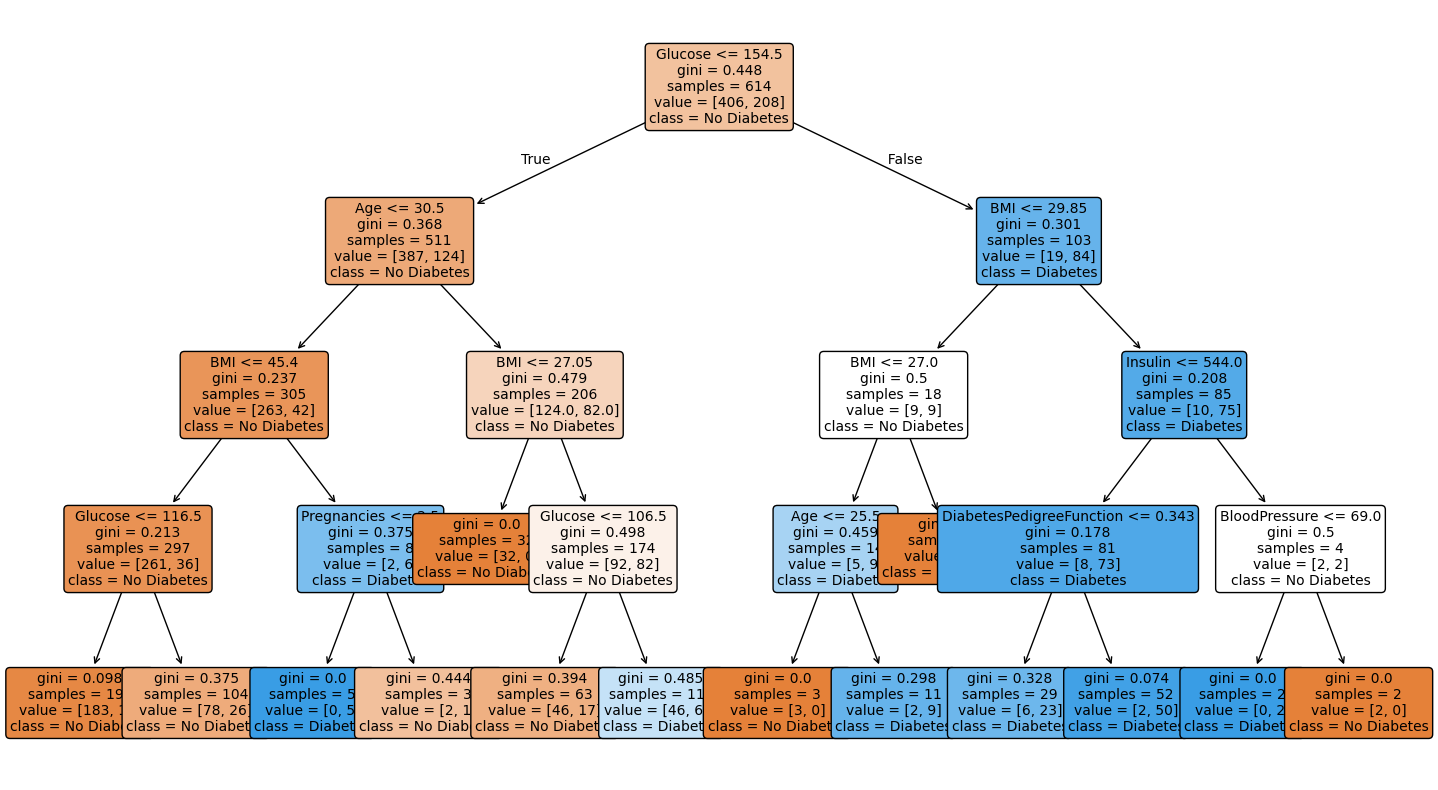

In [15]:
# Visualize the decision tree
plt.figure(figsize=(18,10))
plot_tree(model,
          feature_names=x.columns,
          class_names=['No Diabetes','Diabetes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()